# Homework 3
### NHL Play-by-Play

Iain Muir  
Hriday Singh  
Connor Smith

#### Import Libraries

In [231]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from constants import LOCAL_ROOT

In [232]:
# Silence SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

#### Load Data

In [233]:
DATA = pd.read_csv(
    LOCAL_ROOT + 'Homework/HW 3/nhl_pbp20162017.csv'
)

In [234]:
DATA.shape

(413497, 57)

In [266]:
DATA.columns

Index(['Unnamed: 0', 'Game_Id', 'Date', 'Period', 'Event', 'Description',
       'Time_Elapsed', 'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type',
       'Ev_Team', 'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID',
       'p2_name', 'p2_ID', 'p3_name', 'p3_ID', 'awayPlayer1', 'awayPlayer1_id',
       'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3', 'awayPlayer3_id',
       'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5', 'awayPlayer5_id',
       'awayPlayer6', 'awayPlayer6_id', 'homePlayer1', 'homePlayer1_id',
       'homePlayer2', 'homePlayer2_id', 'homePlayer3', 'homePlayer3_id',
       'homePlayer4', 'homePlayer4_id', 'homePlayer5', 'homePlayer5_id',
       'homePlayer6', 'homePlayer6_id', 'Away_Players', 'Home_Players',
       'Away_Score', 'Home_Score', 'Away_Goalie', 'Away_Goalie_Id',
       'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC', 'Home_Coach',
       'Away_Coach'],
      dtype='object')

In [236]:
DATA.head()

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Away_Score,Home_Score,Away_Goalie,Away_Goalie_Id,Home_Goalie,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach
0,0,20001,2016-10-12,1,PSTR,Period Start- Local time: 7:18 EDT,0:00,0.0,5x5,NaN,...,0,0,FREDERIK ANDERSEN,8475883.0,CRAIG ANDERSON,8467950.0,NaN,NaN,GUY BOUCHER,MIKE BABCOCK
1,1,20001,2016-10-12,1,FAC,TOR won Neu. Zone - TOR #43 KADRI vs OTT #19 B...,0:00,0.0,5x5,Neu,...,0,0,FREDERIK ANDERSEN,8475883.0,CRAIG ANDERSON,8467950.0,0.0,0.0,GUY BOUCHER,MIKE BABCOCK
2,2,20001,2016-10-12,1,STOP,ICING,0:05,5.0,5x5,NaN,...,0,0,FREDERIK ANDERSEN,8475883.0,CRAIG ANDERSON,8467950.0,NaN,NaN,GUY BOUCHER,MIKE BABCOCK
3,3,20001,2016-10-12,1,FAC,TOR won Def. Zone - TOR #43 KADRI vs OTT #19 B...,0:05,5.0,5x5,Def,...,0,0,FREDERIK ANDERSEN,8475883.0,CRAIG ANDERSON,8467950.0,69.0,22.0,GUY BOUCHER,MIKE BABCOCK
4,4,20001,2016-10-12,1,TAKE,"TOR TAKEAWAY - #16 MARNER, Off. Zone",0:43,43.0,5x5,Off,...,0,0,FREDERIK ANDERSEN,8475883.0,CRAIG ANDERSON,8467950.0,-81.0,38.0,GUY BOUCHER,MIKE BABCOCK


In [237]:
# Eliminate Irrelevant Features
df = DATA[
   ['Game_Id', 'Date', 'Period', 'Event', 'Description', 
    'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type', 'Ev_Team',
    'Home_Zone', 'Away_Team', 'Home_Team', 'Away_Players',
    'Home_Players', 'Away_Score', 'Home_Score', 'xC', 'yC'] 
]

In [238]:
df.shape

(413497, 19)

In [239]:
# Filter for Regular time (not OT) and for all SHOTs
shots = df.loc[
    (df['Period'].isin([1, 2, 3])) & (df['Event'] == 'SHOT')
]

In [240]:
shots.shape

(71337, 19)

In [241]:
shots.head()

,Game_Id,Date,Period,Event,Description,Seconds_Elapsed,Strength,Ev_Zone,Type,Ev_Team,Home_Zone,Away_Team,Home_Team,Away_Players,Home_Players,Away_Score,Home_Score,xC,yC
7,20001,2016-10-12,1,SHOT,"TOR ONGOAL - #16 MARNER, Wrist, Off. Zone, 13 ft.",71.0,5x5,Off,WRIST SHOT,TOR,Def,TOR,OTT,6,6,0,0,-77.0,5.0
14,20001,2016-10-12,1,SHOT,"OTT ONGOAL - #22 KELLY, Wrist, Off. Zone, 13 ft.",173.0,5x5,Off,WRIST SHOT,OTT,Off,TOR,OTT,6,6,0,0,86.0,13.0
21,20001,2016-10-12,1,SHOT,"OTT ONGOAL - #5 CECI, Wrist, Neu. Zone, 77 ft.",241.0,5x5,Neu,WRIST SHOT,OTT,Neu,TOR,OTT,6,6,0,0,23.0,-38.0
23,20001,2016-10-12,1,SHOT,"OTT ONGOAL - #65 KARLSSON, Slap, Off. Zone, 58...",286.0,5x5,Off,SLAP SHOT,OTT,Off,TOR,OTT,6,6,0,0,33.0,-15.0
36,20001,2016-10-12,1,SHOT,"TOR ONGOAL - #52 MARINCIN, Wrist, Off. Zone, 6...",406.0,5x5,Off,WRIST SHOT,TOR,Def,TOR,OTT,6,6,0,0,-34.0,28.0


#### Create Time Bins

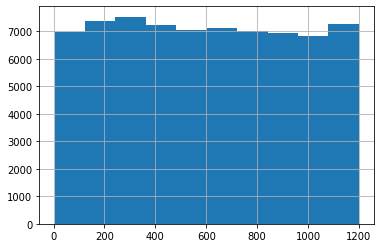

In [242]:
# Appears to be a uniform distribution of shots across all periods
shots['Seconds_Elapsed'].hist()
plt.show()

In [243]:
# Max: End of Period -- 20 mins; Min: Beginning -- 4 secs into Period
max_ = int(max(shots['Seconds_Elapsed']))
min_ = int(min(shots['Seconds_Elapsed']))
print("Max:", max_)
print("Min:", min_)

Max: 1200
Min: 4


In [244]:
BIN_MINS = 0.5
BIN_SECONDS = BIN_MINS * 60

In [245]:
BINS = list(range(min_, max_+25, int(BIN_SECONDS)))
LABELS = list(range(1, len(BINS)))

print("Bins:", BINS)
print("Labels:", LABELS)

for i, label in enumerate(LABELS):
    print("   Bin {}: {}-{}".format(label, BINS[i], BINS[label]))


Bins: [4, 34, 64, 94, 124, 154, 184, 214, 244, 274, 304, 334, 364, 394, 424, 454, 484, 514, 544, 574, 604, 634, 664, 694, 724, 754, 784, 814, 844, 874, 904, 934, 964, 994, 1024, 1054, 1084, 1114, 1144, 1174, 1204]
Labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
   Bin 1: 4-34
   Bin 2: 34-64
   Bin 3: 64-94
   Bin 4: 94-124
   Bin 5: 124-154
   Bin 6: 154-184
   Bin 7: 184-214
   Bin 8: 214-244
   Bin 9: 244-274
   Bin 10: 274-304
   Bin 11: 304-334
   Bin 12: 334-364
   Bin 13: 364-394
   Bin 14: 394-424
   Bin 15: 424-454
   Bin 16: 454-484
   Bin 17: 484-514
   Bin 18: 514-544
   Bin 19: 544-574
   Bin 20: 574-604
   Bin 21: 604-634
   Bin 22: 634-664
   Bin 23: 664-694
   Bin 24: 694-724
   Bin 25: 724-754
   Bin 26: 754-784
   Bin 27: 784-814
   Bin 28: 814-844
   Bin 29: 844-874
   Bin 30: 874-904
   Bin 31: 904-934
   Bin 32: 934-964
   Bin 33: 964-994
   Bin 34: 994-1

In [246]:
shots['BINS'] = pd.cut(
    shots['Seconds_Elapsed'], bins=BINS, labels=LABELS
)

#### Group Observations

In [247]:
from sklearn.preprocessing import LabelEncoder

In [248]:
# Remove Outlier Strengths
shots = shots[shots['Strength'].str.match('[3-6]x[3-6]').values]
shots = shots.dropna()

In [249]:
# Encode Categorical Variables -- Speed up pandas groupby
shots['Ev_Team_Enc'] = LabelEncoder().fit_transform(shots['Ev_Team'])
shots['Strength_Enc'] = LabelEncoder().fit_transform(shots['Strength'])

In [250]:
# Subset Most Important Predictors
model_df = shots[['Ev_Team_Enc', 'Game_Id', 'Period', 'BINS', 'Strength_Enc']]
model_df = model_df.dropna(subset=['BINS'])
model_df['BINS'] = model_df['BINS'].astype(int)

In [251]:
model_df.shape

(71283, 5)

In [252]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71283 entries, 7 to 413475
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Ev_Team_Enc   71283 non-null  int64
 1   Game_Id       71283 non-null  int64
 2   Period        71283 non-null  int64
 3   BINS          71283 non-null  int64
 4   Strength_Enc  71283 non-null  int64
dtypes: int64(5)
memory usage: 3.3 MB


In [253]:
groups = model_df.groupby(
    ['Period', 'BINS']
).size()

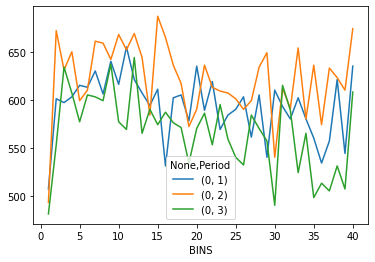

In [254]:
pivot_ = groups.reset_index().pivot(index='BINS', columns='Period')
pivot_.plot()
plt.show()

In [255]:
# groups = model_df.groupby(
#     ['Ev_Team_Enc', 'Period', 'BINS']
# ).size()
groups

Period  BINS
1       1       507
        2       601
        3       597
        4       603
        5       615
               ... 
3       36      513
        37      505
        38      531
        39      507
        40      608
Length: 120, dtype: int64

In [256]:
flat_groups = groups.reset_index()
flat_groups.columns = ['Period', 'Time Bins', 'Count']
flat_groups.head()

,Period,Time Bins,Count
0,1,1,507
1,1,2,601
2,1,3,597
3,1,4,603
4,1,5,615


<AxesSubplot:>

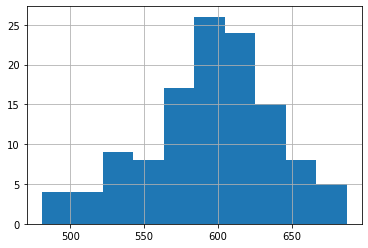

In [257]:
flat_groups['Count'].hist()

#### Poisson Regressor

In [258]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [259]:
X = flat_groups[['Period', 'Time Bins']]
y = flat_groups['Count']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [261]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (96, 2)
X_test: (24, 2)
y_train: (96,)
y_test: (24,)


In [262]:
pois = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [263]:
print(pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   96
Model:                            GLM   Df Residuals:                       94
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71752.
Date:                Tue, 02 Nov 2021   Deviance:                   1.4272e+05
Time:                        20:26:28   Pearson chi2:                 7.15e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Period         1.8297      0.005    371.171      0.0

In [264]:
predictions = pois.get_prediction(X_test)
predictions_summary = predictions.summary_frame()
print(predictions_summary)

            mean   mean_se  mean_ci_lower  mean_ci_upper
60    133.008905  0.466654     132.097418     133.926681
30     38.355141  0.378821      37.619805      39.104850
34     48.490254  0.567440      47.390749      49.615268
15     15.920541  0.052272      15.818419      16.023321
29     36.171445  0.340800      35.509620      36.845606
71    253.463611  1.664382     250.222385     256.746822
48     65.824580  0.404287      65.036942      66.621757
98    737.224225  5.351943     726.808882     747.788822
7       9.960842  0.019553       9.922593       9.999239
104  1047.962897  5.961261    1036.343931    1059.712130
52     83.218325  0.393932      82.449803      83.994011
0       6.608335  0.029736       6.550310       6.666874
35     51.417644  0.625221      50.206720      52.657774
96    655.668261  5.200258     645.554752     665.940212
103   988.298620  5.820020     976.957168     999.771734
86    364.843807  4.310439     356.492565     373.390687
38     61.303508  0.829696     

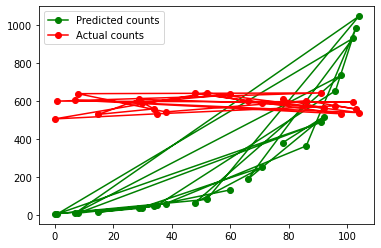

In [265]:
predictions = predictions_summary['mean']
actual = y_test
fig = plt.figure()
predicted, = plt.plot(X_test.index, predictions, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()